# WeatherPy
----

#### Analysis
* There is a strong negative relationship between latitude and temperature in the Northern Hemisphere and a weak positive relationship in the Southern Hemisphere. The farther away from the equator (0 degrees latitude) one travels in the Northern Hemisphere, there is a strong likelihood the temperature will continue to get colder. Whereas, in the Southern Hemisphere, the farther away one travels from the equator the likelihood of experiencing colder temperatures is not as likely.
* There seems to be no correlation between latitude and cloud coverage, as the points in the scatter plot are pretty evenly distributed throughout. Meaning, the likelihood of experiencing cloud coverage is similar no matter what the latitude.
* Comparing the humidity between the Northern and Southern Hemispheres is interesting. Firstly, they both showed weak relationships between latitude and humidity. Secondly, moving away from the equator in the Northern Hemisphere shows an increase in humidity, while moving away from the equator in the Southern Hemisphere shows a decrease in humidity. The slope in the line of regression is very similar for both hemispheres, so the rate of change in humidity is similar for the two hemispheres.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# cities

In [4]:
# Create base url to scan API
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial"
base_url = f"{url}&appid={weather_api_key}"

In [5]:
# Create parameters
# cities = cities[0:10]
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [6]:
# Create a for loop to go through each city. 
# Include a try/except so code doesn't break.
counter = 0

for city in cities:
    my_city_url = base_url + '&q=' + city
#     print(city)
#     counter += 1
#     if counter == 10:
#         break

    try:
        response = requests.get(my_city_url).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        time.sleep(0.5)
        
    except (KeyError, ValueError):
        # Append null values
#         print("Missing field...skipping.")
        pass
    
print(response)

{'coord': {'lon': 38.0867, 'lat': 40.1644}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.45, 'feels_like': -3.78, 'temp_min': 3.45, 'temp_max': 3.45, 'pressure': 1024, 'humidity': 85, 'sea_level': 1024, 'grnd_level': 890}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 324}, 'clouds': {'all': 73}, 'dt': 1613620316, 'sys': {'country': 'TR', 'sunrise': 1613621827, 'sunset': 1613660780}, 'timezone': 10800, 'id': 739209, 'name': 'Suşehri', 'cod': 200}


In [7]:
# Create a dataframe from the cities, lat, temp, humidity, cloudiness, and wind speed.
city_weather_df = pd.DataFrame({"City": city_name,
                                "City Latitude": lat,
                                "City Longitude": lng,
                                "Max Temperature": max_temp,
                                "Humidity": humidity,
                                "Cloud Coverage": cloudiness,
                                "Wind Speed": wind_speed,
                                "City Country": country,
                                "City Datetime": date
                               })


city_weather_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Oranjemund,-28.5500,16.4333,64.02,84,51,8.61,NA,1613619744
1,Rikitea,-23.1203,-134.9692,79.23,65,13,8.77,PF,1613619599
2,Pilar,-9.5972,-35.9567,75.20,88,0,4.61,BR,1613619745
3,Viedma,-40.8135,-62.9967,66.99,75,0,16.51,AR,1613619746
4,Yellowknife,62.4560,-114.3525,-9.00,84,75,10.36,CA,1613619747
...,...,...,...,...,...,...,...,...,...
558,Warri,5.5167,5.7500,76.19,92,59,3.13,NG,1613620312
559,Rocha,-34.4833,-54.3333,64.51,95,26,6.11,UY,1613620286
560,Iberia,29.9502,-91.7507,37.40,93,90,12.66,US,1613620314
561,Yerbogachën,61.2767,108.0108,-12.06,87,94,3.71,RU,1613620315


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export the city data into a .csv
city_weather_df.to_csv("City_Weather.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

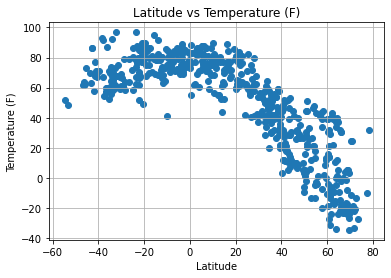

In [9]:
# Build a scatter plot for Latitude vs Temperature (F)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_TemperatureInWorldCities")

plt.show()

The "Latitude vs Temperature" scatter plot compares the latitude with the temperature of hundreds of cities around the world.

## Latitude vs. Humidity Plot

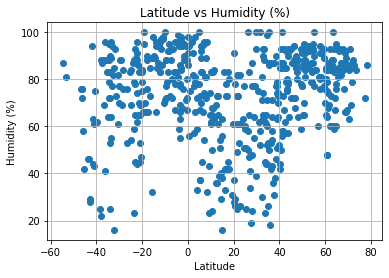

In [10]:
# Build a scatter plot for Latitude vs Humidity 
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_HumidityInWorldCities")

plt.show()

The "Latitude vs Humidity" scatter plot compares the latitude with the humidity of hundreds of cities around the world.

## Latitude vs. Cloudiness Plot

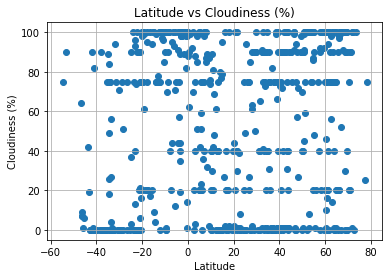

In [11]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Cloud Coverage"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_CloudinessInWorldCities")

plt.show()

The "Latitude vs Cloudiness" scatter plot compares the latitude with the cloudiness in hundreds of cities around the world.

## Latitude vs. Wind Speed Plot

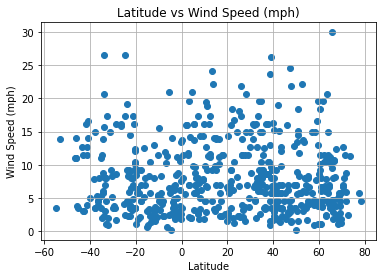

In [12]:
# Build a scatter plot for Latitude vs Wind Speed (mph)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Wind_SpeedInWorldCities")

plt.show()

The "Latitude vs Wind Speed" scatter plot compares the latitude with the wind speed in hundreds of cities around the world.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_weather_df["Humidity"].max()

100

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_weather_df.dropna(inplace=True)
city_weather_df.reset_index(drop=True, inplace=True)
city_weather_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Oranjemund,-28.5500,16.4333,64.02,84,51,8.61,NA,1613619744
1,Rikitea,-23.1203,-134.9692,79.23,65,13,8.77,PF,1613619599
2,Pilar,-9.5972,-35.9567,75.20,88,0,4.61,BR,1613619745
3,Viedma,-40.8135,-62.9967,66.99,75,0,16.51,AR,1613619746
4,Yellowknife,62.4560,-114.3525,-9.00,84,75,10.36,CA,1613619747
...,...,...,...,...,...,...,...,...,...
558,Warri,5.5167,5.7500,76.19,92,59,3.13,NG,1613620312
559,Rocha,-34.4833,-54.3333,64.51,95,26,6.11,UY,1613620286
560,Iberia,29.9502,-91.7507,37.40,93,90,12.66,US,1613620314
561,Yerbogachën,61.2767,108.0108,-12.06,87,94,3.71,RU,1613620315


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_max_temp = northern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_max_temp)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)


4       4.185085
6      41.599848
8      36.573102
11      6.538312
12      3.364673
         ...    
557    39.789142
558    82.827591
560    49.080922
561     5.813891
562    34.973438
Name: City Latitude, Length: 373, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.38x +90.45


The r-value is 0.7644351692195954


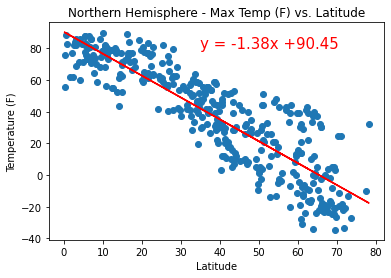

In [17]:
# Create plot
plt.scatter(north_latitude, north_max_temp)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(35, 80),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_max_temp = southern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_max_temp)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      71.787732
1      73.377263
2      77.336117
3      68.197622
5      71.146205
         ...    
542    72.738956
544    76.083948
548    74.156147
552    70.631379
559    70.050773
Name: City Latitude, Length: 190, dtype: float64


In [19]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.29x +80.15


The r-value is 0.14767782425472184


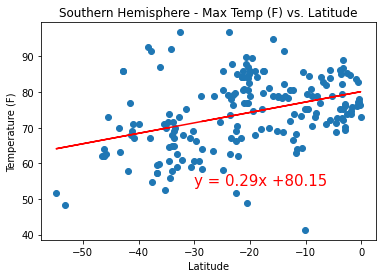

In [20]:
# Create plot
plt.scatter(south_latitude, south_max_temp)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-30, 54),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_humidity = northern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_humidity)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

4      79.556396
6      70.625220
8      71.825141
11     78.994663
12     79.752234
         ...    
557    71.057449
558    60.783859
560    68.839433
561    79.167588
562    72.206992
Name: City Latitude, Length: 373, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.33x +58.97


The r-value is 0.12450311327013631


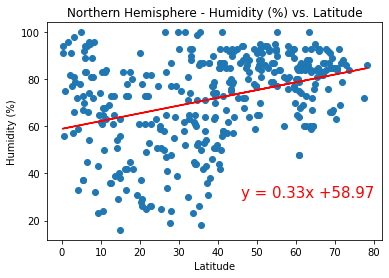

In [23]:
# Create plot
plt.scatter(north_latitude, north_humidity)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(46, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_humidity = southern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_humidity)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      72.770951
1      75.285465
2      81.548061
3      67.091680
5      71.756106
         ...    
542    74.275714
544    79.567228
548    76.517598
552    70.941692
559    70.023219
Name: City Latitude, Length: 190, dtype: float64


In [25]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.46x +85.99


The r-value is 0.12317487564861807


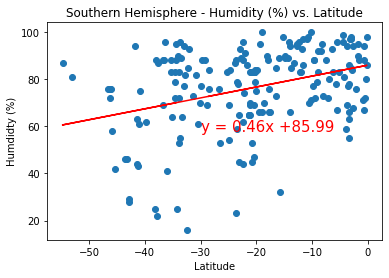

In [26]:
# Create plot
plt.scatter(south_latitude, south_humidity)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humdidty (%)')
plt.annotate(line_eq,(-30, 58),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_cloudiness = northern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_cloudiness)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

4      59.029535
6      51.674310
8      52.662499
11     58.566923
12     59.190816
         ...    
557    52.030270
558    43.569507
560    50.203634
561    58.709334
562    52.976971
Name: City Latitude, Length: 373, dtype: float64


In [28]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.27x +42.07


The r-value is 0.020745066711472877


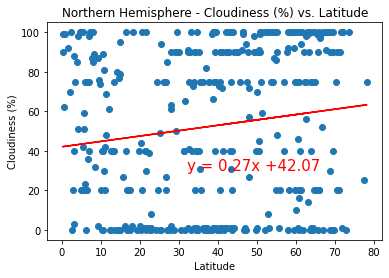

In [29]:
# Create plot
plt.scatter(north_latitude, north_cloudiness)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(32, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_cloudiness = southern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_cloudiness)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      39.735049
1      47.692844
2      67.512365
3      21.761603
5      36.523323
         ...    
542    44.497239
544    61.243534
548    51.592232
552    33.945910
559    31.039176
Name: City Latitude, Length: 190, dtype: float64


In [31]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 1.47x +81.58


The r-value is 0.2223942608108917


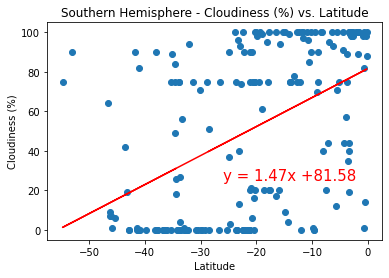

In [32]:
# Create plot
plt.scatter(south_latitude, south_cloudiness)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-26, 25),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_wind_speed = northern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_wind_speed)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

4      7.217687
6      8.344270
8      8.192911
11     7.288544
12     7.192984
         ...   
557    8.289748
558    9.585664
560    8.569530
561    7.266731
562    8.144744
Name: City Latitude, Length: 373, dtype: float64


In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.04x +9.82


The r-value is 0.025357940609690748


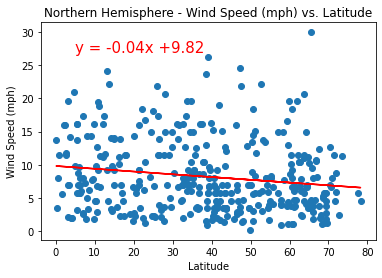

In [35]:
# Create plot
plt.scatter(north_latitude, north_wind_speed)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5, 27),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_wind_speed = southern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_wind_speed)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      7.723219
1      7.233480
2      6.013748
3      8.829340
5      7.920875
         ...   
542    7.430144
544    6.399544
548    6.993504
552    8.079494
559    8.258380
Name: City Latitude, Length: 190, dtype: float64


In [37]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.09x +5.15


The r-value is 0.05790652671516946


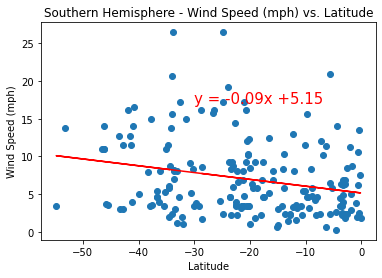

In [38]:
# Create plot
plt.scatter(south_latitude, south_wind_speed)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-30, 17),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()